# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [112]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [113]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

In [152]:
sinasc_raw['totFilhos'] = sinasc_raw['QTDFILVIVO'] + sinasc_raw['QTDFILMORT']

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [153]:
# Verificar as colunas disponíveis no DataFrame
print(sinasc_raw.columns)

# Criar uma nova coluna 'FaixaLat' usando mapping
sinasc_raw['FaixaLat'] = sinasc_raw['munResLat'].map(lambda x: 'Abaixo de -10.5' if x < -10.5 else 'Acima de -10.5')

# Aplicar groupby e realizar operações desejadas
resultados = sinasc_raw.groupby('FaixaLat')[['QTDFILVIVO', 'QTDFILMORT']].agg({'sum','mean','min','max','median','std','var'}).reset_index()

# Exibir os resultados
print(resultados)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'FaixaLat', 'Fai

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [115]:
# Criar uma nova coluna 'FaixaArea' usando mapping
sinasc_raw['FaixaArea'] = sinasc_raw['munResArea'].map(lambda x: 'Abaixo de 3000' if x < 3000 else 'Acima de 3000')

# Aplicar groupby e realizar operações desejadas
resultados_area = sinasc_raw.groupby('FaixaArea')[['QTDFILVIVO', 'QTDFILMORT']].agg({'sum','mean','min','max','median','std','var'}).reset_index()

# Exibir os resultados
print(resultados_area)


        FaixaArea QTDFILVIVO                                                \
                         min      mean      sum       std median       var   
0  Abaixo de 3000        0.0  0.924284   4773.0  1.075442    1.0  1.156575   
1   Acima de 3000        0.0  1.086886  22054.0  1.191721    1.0  1.420198   

        QTDFILMORT                                                     
    max        min      mean     sum       std median       var   max  
0  30.0        0.0  0.244803  1260.0  0.551215    0.0  0.303838   4.0  
1  14.0        0.0  0.272153  5384.0  0.629087    0.0  0.395750  28.0  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [116]:
# Criar faixas na variável munResAlt
faixas_altitude = pd.cut(sinasc_raw['munResAlt'], bins=[float('-inf'), 500, 1000, float('inf')],
                         labels=['Baixa Altitude', 'Média Altitude', 'Alta Altitude'])

# Adicionar a coluna 'FaixaAltitude' ao DataFrame
sinasc_raw['FaixaAltitude'] = faixas_altitude

# Aplicar groupby e realizar operações desejadas
resultados_altitude = sinasc_raw.groupby('FaixaAltitude')[['QTDFILVIVO', 'QTDFILMORT']].agg({'sum','mean','min','max','median','std','var'}).reset_index()

# Exibir os resultados
print(resultados_altitude)


    FaixaAltitude QTDFILVIVO                                                \
                         min      mean      sum       std median       var   
0  Baixa Altitude        0.0  1.062924  25372.0  1.179579    1.0  1.391407   
1  Média Altitude        0.0  0.917929   1454.0  1.021973    1.0  1.044429   
2   Alta Altitude        NaN       NaN      0.0       NaN    NaN       NaN   

        QTDFILMORT                                                     
    max        min      mean     sum       std median       var   max  
0  30.0        0.0  0.267486  6245.0  0.592095    0.0  0.350576   9.0  
1  10.0        0.0  0.251580   398.0  0.874790    0.0  0.765257  28.0  
2   NaN        NaN       NaN     0.0       NaN    NaN       NaN   NaN  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [117]:
#criando os agrupamentos imediatos
regioes_imediatas = {"Porto Velho":"Candeias do Jamari",
"Porto Velho":"Guajará-Mirim",
"Porto Velho":"Itapuã do Oeste",
"Porto Velho":"Nova Mamoré",
"Porto Velho":"Porto Velho",
"Ariquemes":"Alto Paraíso",
"Ariquemes":"Ariquemes",
"Ariquemes":"Buritis",
"Ariquemes":"Cacaulândia",
"Ariquemes":"Campo Novo de Rondônia",
"Ariquemes":"Cujubim",
"Ariquemes":"Monte Negro",
"Ariquemes":"Rio Crespo",
"Ji-Paraná":"Governador Jorge Teixeira",
"Ji-Paraná":"Jaru",
"Ji-Paraná":"Machadinho d'Oeste",
"Ji-Paraná":"Theobroma",
"Ji-Paraná":"Vale do Anari",
"Ji-Paraná":"Alvorada d'Oeste",
"Ji-Paraná":"Costa Marques",
"Ji-Paraná":"Ji-Paraná",
"Ji-Paraná":"Mirante da Serra",
"Ji-Paraná":"Nova União",
"Ji-Paraná":"Ouro Preto do Oeste",
"Ji-Paraná":"Presidente Médici",
"Ji-Paraná":"São Francisco do Guaporé",
"Ji-Paraná":"São Miguel do Guaporé",
"Ji-Paraná":"Seringueiras",
"Ji-Paraná":"Teixeirópolis",
"Ji-Paraná":"Urupá",
"Ji-Paraná":"Vale do Paraíso",
"Cacoal":"Alta Floresta d'Oeste",
"Cacoal":"Alto Alegre dos Parecis",
"Cacoal":"Cacoal",
"Cacoal":"Castanheiras",
"Cacoal":"Espigão d'Oeste",
"Cacoal":"Ministro Andreazza",
"Cacoal":"Nova Brasilândia d'Oeste",
"Cacoal":"Novo Horizonte do Oeste",
"Cacoal":"Parecis",
"Cacoal":"Pimenta Bueno",
"Cacoal":"Primavera de Rondônia",
"Cacoal":"Rolim de Moura",
"Cacoal":"Santa Luzia d'Oeste",
"Cacoal":"São Felipe d'Oeste",
"Vilhena":"Cabixi",
"Vilhena":"Cerejeiras",
"Vilhena":"Chupinguaia",
"Vilhena":"Colorado do Oeste",
"Vilhena":"Corumbiara",
"Vilhena":"Pimenteiras do Oeste",
"Vilhena":"Vilhena"}

In [121]:
#criando index
sinasc_2 = sinasc_raw.set_index('munResNome')

# Extrair o ano da coluna 'DTNASC'
# sinasc_2['ANO_MES_NASCIMENTO'] = pd.to_datetime(sinasc_2['DTNASC']).dt.to_period('Y')

# Extraindo só o campo mês
sinasc_2['ANO_MES_NASCIMENTO'] = pd.to_datetime(sinasc_2['DTNASC']).dt.strftime('%m')

# Agrupar por 'regioes_imediatas' e 'ANO_NASCIMENTO' e calcular a média da coluna 'IDADEMAE'
resultado = sinasc_2.groupby([regioes_imediatas, 'ANO_MES_NASCIMENTO'])['IDADEMAE'].mean().reset_index()

print(resultado)

#convertendo novamente para string para que não dê erro no gráfico
# resultado['ANO_MES_NASCIMENTO'] = str(resultado['ANO_MES_NASCIMENTO'])

#resultado.reset_index(drop=True, inplace=True)

            munResNome ANO_MES_NASCIMENTO   IDADEMAE
0          Porto Velho                 01  26.092541
1          Porto Velho                 02  26.337818
2          Porto Velho                 03  26.596774
3          Porto Velho                 04  26.303815
4          Porto Velho                 05  25.887967
5          Porto Velho                 06  26.508621
6          Porto Velho                 07  26.275862
7          Porto Velho                 08  26.313454
8          Porto Velho                 09  26.163889
9          Porto Velho                 10  26.017518
10         Porto Velho                 11  26.542474
11         Porto Velho                 12  26.753823
12          Rio Crespo                 01  25.181818
13          Rio Crespo                 02  25.031746
14          Rio Crespo                 03  25.304965
15          Rio Crespo                 04  25.591195
16          Rio Crespo                 05  25.267974
17          Rio Crespo                 06  26.

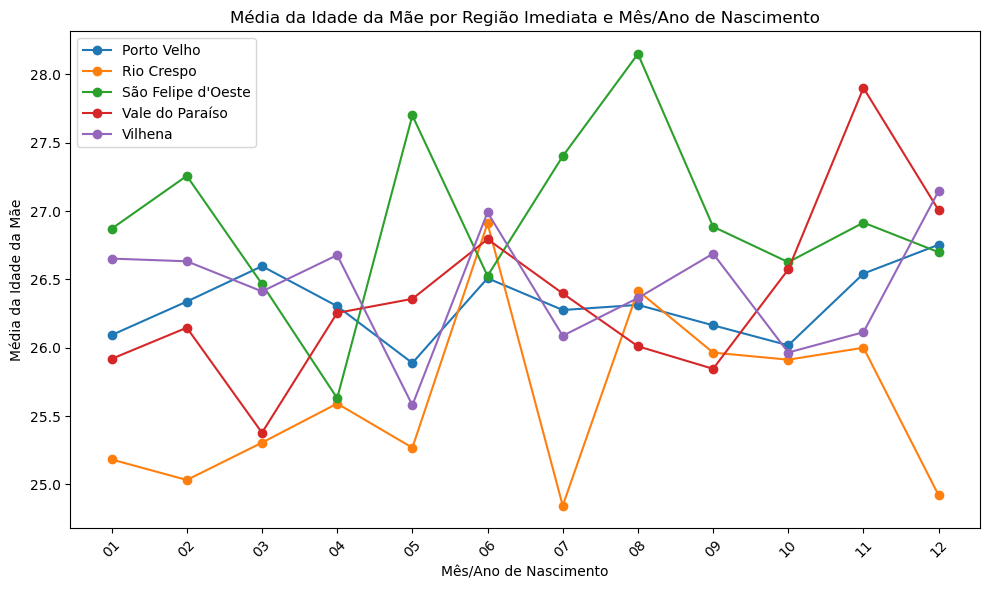

In [123]:
# Plotar o conteúdo
resultado.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
for regiao, grupo in resultado.groupby('munResNome'):
    plt.plot(grupo['ANO_MES_NASCIMENTO'], grupo['IDADEMAE'], label=regiao, marker='o')

plt.title('Média da Idade da Mãe por Região Imediata e Mês/Ano de Nascimento')
plt.xlabel('Mês/Ano de Nascimento')
plt.ylabel('Média da Idade da Mãe')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [154]:
#criando index
sinasc_3 = sinasc_raw[['IDADEMAE','munResNome','APGAR5','QTDFILVIVO','totFilhos']].set_index('munResNome')

In [131]:
#criando os agrupamentos idh
nivel_idh = {"Porto Velho":"IDH ALTO",
"Vilhena":"IDH ALTO",
"Cacoal":"IDH ALTO",
"Ji-Paraná":"IDH ALTO",
"Pimenta Bueno":"IDH ALTO",
"Ariquemes":"IDH ALTO",
"Rolim de Moura":"IDH ALTO",
"Cerejeiras":"IDH MEDIO",
"Jaru":"IDH MEDIO",
"Colorado do Oeste":"IDH MEDIO",
"Ouro Preto do Oeste":"IDH MEDIO",
"Espigão d'Oeste":"IDH MEDIO",
"Santa Luzia d'Oeste":"IDH MEDIO",
"Pimenteiras do Oeste":"IDH MEDIO",
"Presidente Médici":"IDH MEDIO",
"Castanheiras":"IDH MEDIO",
"Guajará-Mirim":"IDH MEDIO",
"Chupinguaia":"IDH MEDIO",
"Cabixi":"IDH MEDIO",
"Candeias do Jamari":"IDH MEDIO",
"São Felipe d'Oeste":"IDH MEDIO",
"Cacaulândia":"IDH MEDIO",
"São Miguel do Guaporé":"IDH MEDIO",
"Mirante da Serra":"IDH MEDIO",
"Alvorada d'Oeste":"IDH MEDIO",
"Teixeirópolis":"IDH MEDIO",
"Nova Brasilândia d'Oeste":"IDH MEDIO",
"Rio Crespo":"IDH MEDIO",
"Primavera de Rondônia":"IDH MEDIO",
"Alta Floresta d'Oeste":"IDH MEDIO",
"Ministro Andreazza":"IDH MEDIO",
"Novo Horizonte do Oeste":"IDH MEDIO",
"Vale do Paraíso":"IDH MEDIO",
"Alto Paraíso":"IDH MEDIO",
"Parecis":"IDH MEDIO",
"Buritis":"IDH MEDIO",
"Itapuã do Oeste":"IDH MEDIO",
"Corumbiara":"IDH MEDIO",
"Cujubim":"IDH MEDIO",
"Costa Marques":"IDH MEDIO",
"São Francisco do Guaporé":"IDH MEDIO",
"Urupá":"IDH MEDIO",
"Monte Negro":"IDH MEDIO",
"Seringueiras":"IDH BAIXO",
"Governador Jorge Teixeira":"IDH BAIXO",
"Machadinho d'Oeste":"IDH BAIXO",
"Campo Novo de Rondônia":"IDH BAIXO",
"Alto Alegre dos Parecis":"IDH BAIXO",
"Theobroma":"IDH BAIXO",
"Nova União":"IDH BAIXO",
"Nova Mamoré":"IDH BAIXO",
"Vale do Anari":"IDH BAIXO"}

In [155]:
sinasc_3.groupby(nivel_idh).agg({'mean','median','min','max'})

IDADEMAE                   APGAR5                   QTDFILVIVO  \
                 mean max median min      mean   max median  min       mean   
munResNome                                                                    
IDH ALTO    26.280332  47   26.0  12  9.171668  10.0    9.0  0.0   1.033960   
IDH BAIXO   25.269231  46   25.0  13  9.267925  10.0    9.0  1.0   1.056270   
IDH MEDIO   25.848191  53   25.0  11  9.225567  10.0    9.0  0.0   1.093111   

                             totFilhos                    
             max median  min      mean   max median  min  
munResNome                                                
IDH ALTO    12.0    1.0  0.0  1.290859  29.0    1.0  0.0  
IDH BAIXO    8.0    1.0  0.0  1.280201  11.0    1.0  0.0  
IDH MEDIO   14.0    1.0  0.0  1.348706  15.0    1.0  0.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [137]:
#criando index
sinasc_3 = sinasc_raw[['IDADEMAE','munResNome']].set_index('munResNome')

In [ ]:
nivel_desenv = {"Ariquemes":"DESENV ALTO",
"Vilhena":"DESENV ALTO",
"Pimenta Bueno":"DESENV ALTO",
"Porto Velho":"DESENV ALTO",
"Ji-Paraná":"DESENV ALTO",
"Cacoal":"DESENV ALTO",
"Santa Luzia d'Oeste":"DESENV ALTO",
"Rolim de Moura":"DESENV ALTO",
"Chupinguaia":"DESENV ALTO",
"São Miguel do Guaporé":"DESENV ALTO",
"Pimenteiras do Oeste":"DESENV ALTO",
"Teixeirópolis":"DESENV ALTO",
"Colorado do Oeste":"DESENV ALTO",
"Jaru":"DESENV ALTO",
"Rio Crespo":"DESENV ALTO",
"Primavera de Rondônia":"DESENV ALTO",
"Alta Floresta d'Oeste":"DESENV ALTO",
"Ouro Preto do Oeste":"DESENV ALTO",
"São Francisco do Guaporé":"DESENV ALTO",
"Candeias do Jamari":"DESENV ALTO",
"Buritis":"DESENV ALTO",
"São Felipe d'Oeste":"DESENV ALTO",
"Presidente Médici":"DESENV ALTO",
"Cerejeiras":"DESENV ALTO",
"Monte Negro":"DESENV ALTO",
"Urupá":"DESENV ALTO",
"Espigão d'Oeste":"DESENV MEDIO",
"Seringueiras":"DESENV MEDIO",
"Alvorada d'Oeste":"DESENV MEDIO",
"Itapuã do Oeste":"DESENV MEDIO",
"Cabixi":"DESENV MEDIO",
"Novo Horizonte do Oeste":"DESENV MEDIO",
"Nova Brasilândia d'Oeste":"DESENV MEDIO",
"Vale do Paraíso":"DESENV MEDIO",
"Corumbiara":"DESENV MEDIO",
"Alto Paraíso":"DESENV MEDIO",
"Cacaulândia":"DESENV MEDIO",
"Vale do Anari":"DESENV MEDIO",
"Ministro Andreazza":"DESENV MEDIO",
"Costa Marques":"DESENV MEDIO",
"Nova União":"DESENV MEDIO",
"Guajará-Mirim":"DESENV MEDIO",
"Mirante da Serra":"DESENV MEDIO",
"Parecis":"DESENV MEDIO",
"Castanheiras":"DESENV MEDIO",
"Theobroma":"DESENV MEDIO",
"Machadinho d'Oeste":"DESENV MEDIO",
"Campo Novo de Rondônia":"DESENV MEDIO",
"Nova Mamoré":"DESENV MEDIO",
"Cujubim":"DESENV MEDIO",
"Alto Alegre dos Parecis":"DESENV MEDIO",
"Governador Jorge Teixeira":"DESENV MEDIO"}

In [156]:
sinasc_3.groupby(nivel_desenv).agg({'mean','median','min','max'})

IDADEMAE                   APGAR5                   QTDFILVIVO  \
                   mean max median min      mean   max median  min       mean   
munResNome                                                                      
DESENV ALTO   26.226921  53   26.0  12  9.184522  10.0    9.0  0.0   1.030350   
DESENV MEDIO  25.412005  52   25.0  11  9.233004  10.0    9.0  0.0   1.172404   

                               totFilhos                    
               max median  min      mean   max median  min  
munResNome                                                  
DESENV ALTO   12.0    1.0  0.0  1.285083  29.0    1.0  0.0  
DESENV MEDIO  14.0    1.0  0.0  1.425734  15.0    1.0  0.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [143]:
nivel_pib = {" Porto Velho":"1. MAIS DE 1BI",
"Ji-Paraná":"1. MAIS DE 1BI",
"Vilhena":"1. MAIS DE 1BI",
"Ariquemes":"1. MAIS DE 1BI",
"Cacoal":"1. MAIS DE 1BI",
"Jaru":"1. MAIS DE 1BI",
"Rolim de Moura":"1. MAIS DE 1BI",
"Pimenta Bueno":"1. MAIS DE 1BI",
"Guajará-Mirim":"2.MAIS DE 500MM",
"Ouro Preto do Oeste":"2.MAIS DE 500MM",
"Buritis":"2.MAIS DE 500MM",
"Machadinho do Oeste":"2.MAIS DE 500MM",
"Espigão d'Oeste":"2.MAIS DE 500MM",
"São Miguel do Guaporé":"2.MAIS DE 500MM",
"Candeias do Jamari":"2.MAIS DE 500MM",
"Nova Mamoré":"2.MAIS DE 500MM",
"Cerejeiras":"2.MAIS DE 500MM",
"Alta Floresta do Oeste":"3.MAIS DE 300MM",
"Presidente Médici":"3.MAIS DE 300MM",
"Cujubim":"3.MAIS DE 300MM",
"Nova Brasilândia do Oeste":"3.MAIS DE 300MM",
"Alto Paraíso":"3.MAIS DE 300MM",
"São Francisco do Guaporé":"3.MAIS DE 300MM",
"Colorado do Oeste":"3.MAIS DE 300MM",
"Monte Negro":"4.MAIS DE 200MM",
"Alto Alegre dos Parecis":"4.MAIS DE 200MM",
"Campo Novo de Rondônia":"4.MAIS DE 200MM",
"Alvorada do Oeste":"4.MAIS DE 200MM",
"Chupinguaia":"5.MAIS DE 100MM",
"Corumbiara":"5.MAIS DE 100MM",
"Ministro Andreazza":"5.MAIS DE 100MM",
"Urupá":"5.MAIS DE 100MM",
"Costa Marques":"5.MAIS DE 100MM",
"Seringueiras":"5.MAIS DE 100MM",
"Mirante da Serra":"5.MAIS DE 100MM",
"Governador Jorge Teixeira":"5.MAIS DE 100MM",
"Theobroma":"5.MAIS DE 100MM",
"Santa Luzia do Oeste":"5.MAIS DE 100MM",
"Novo Horizonte do Oeste":"5.MAIS DE 100MM",
"Itapuã do Oeste":"5.MAIS DE 100MM",
"Vale do Paraíso":"5.MAIS DE 100MM",
"Cacaulândia":"5.MAIS DE 100MM",
"Cabixi":"5.MAIS DE 100MM",
"Vale do Anari":"5.MAIS DE 100MM",
"Nova União":"6.MENOS DE 100MM",
"Parecis":"6.MENOS DE 100MM",
"Rio Crespo":"6.MENOS DE 100MM",
"Pimenteiras do Oeste":"6.MENOS DE 100MM",
"Teixeirópolis":"6.MENOS DE 100MM",
"São Felipe do Oeste":"6.MENOS DE 100MM",
"Castanheiras":"6.MENOS DE 100MM",
"Primavera de Rondônia":"6.MENOS DE 100MM"}

In [157]:
sinasc_3.groupby(nivel_pib).agg({'mean','median','min','max'})

IDADEMAE                   APGAR5                    \
                       mean max median min      mean   max median  min   
munResNome                                                               
1. MAIS DE 1BI    26.222820  47   26.0  12  9.124650  10.0    9.0  0.0   
2.MAIS DE 500MM   25.785927  53   25.0  13  9.364374  10.0    9.0  0.0   
3.MAIS DE 300MM   25.706070  47   25.0  11  9.092000  10.0    9.0  0.0   
4.MAIS DE 200MM   25.146435  41   25.0  13  9.319846  10.0    9.0  1.0   
5.MAIS DE 100MM   25.638424  52   25.0  12  9.173984  10.0    9.0  1.0   
6.MENOS DE 100MM  26.519894  41   26.0  14  9.095491  10.0    9.0  0.0   

                 QTDFILVIVO                   totFilhos                    
                       mean   max median  min      mean   max median  min  
munResNome                                                                 
1. MAIS DE 1BI     0.915027  10.0    1.0  0.0  1.153263  29.0    1.0  0.0  
2.MAIS DE 500MM    1.228385  11.0    1.0  0.0  1.521494  14.0    1.0  0.0  
3.MAIS DE 300MM    1.062097   8.0    1.0  0.0  1.312195   9.0    1.0  0.0  
4.MAIS DE 200MM    1.010526   7.0    1.0  0.0  1.225513   8.0    1.0  0.0  
5.MAIS DE 100MM    0.992320  14.0    1.0  0.0  1.225771  15.0    1.0  0.0  
6.MENOS DE 100MM   1.032258   6.0    1.0  0.0  1.202156   7.0    1.0  0.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

## Com as análise pode-se constatar que, regiões onde o PIB e o IDH maiores, tendendiciam a ter-se uma média de filhos vivos menor, assim como o total de filhos (vivos e mortos), e uma média de idade das mães ligeiramente maior. Logo, podemos dizer que para essa amostra, mais riqueza e mais desenvolvimento resulta uma gravidez um pouco mais tardia e com uma quantidade menor de filhos.